In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
from scipy.integrate import odeint

Text(0, 0.5, 'T')

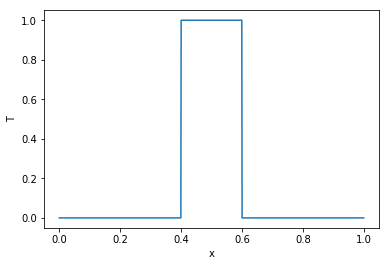

In [21]:
c = 0.025 #difuzivna konstanta
l = 1 #dolžina
n = 1000 #št. diskretizacijskih točk
dx = l/n
x = np.arange(0, l, dx)

w = 2*np.pi*np.fft.fftfreq(n, d = dx)

T0 = np.zeros(len(x))
for i in range(int(n/2 - n/10), int(n/2 + n/10)):
    T0[i] = 1

plt.plot(x, T0);
plt.xlabel("x")
plt.ylabel("T")

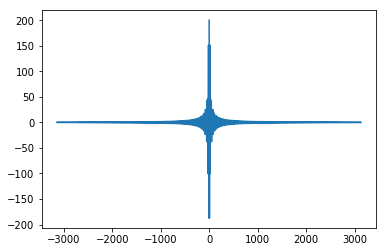

In [22]:
T0_ = np.fft.fft(T0)
plt.plot(w, T0_);

In [23]:
def loci_komlpeksna(z):
    loceno = np.concatenate((z.real, z.imag))
    return loceno

def zdruzi_kompleksna(z):
    zdruzeno = z[:int((len(z) /2))] + 1j * z[int((len(z) /2)):]
    return zdruzeno

T0_locena = loci_komlpeksna(T0_)
dt = 0.05
t = np.arange(0, 10, dt)

In [24]:
#OPOMBA: Indeks spremenljivke "_" pomeni transformirano funkcijo

def toplotna_enacba(T_locena, t, w, c):
    T_ = zdruzi_kompleksna(T_locena)
    dT_ = - np.power(c, 2) * np.power(w, 2) * T_
    return(loci_komlpeksna(dT_).astype("float64"))

T_locena = odeint(toplotna_enacba, T0_locena, t, args = (w, c))
T_ = np.array([])
for i in range(0, len(T_locena)):
    T_ = np.append(T_, zdruzi_kompleksna(T_locena[i]))
T_ = T_.reshape(int(10 / dt), 1000)

T = np.fft.ifft(T_).real

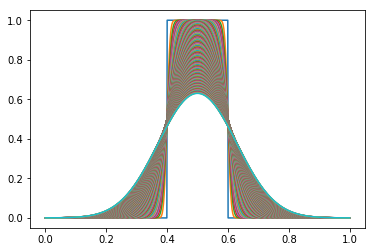

In [25]:
for i in range(0, 200):
    plt.plot(x, T[i])

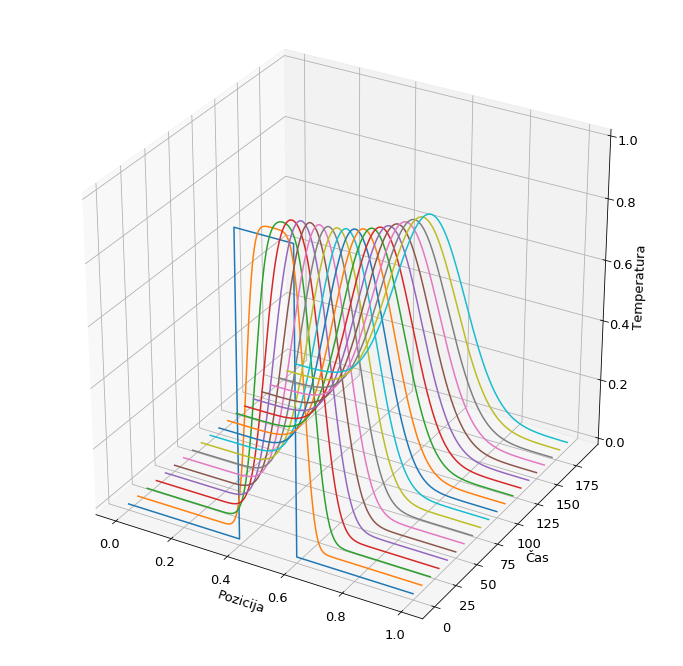

In [26]:
fig = plt.figure()
fig.set_size_inches(12,12)
plt.rcParams.update({'font.size': 13})
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Pozicija")
ax.set_ylabel("Čas")
ax.set_zlabel("Temperatura")

for i in range(0, len(T), 10):
    cas = i*np.ones(len(T[i]))
    ax.plot(x, cas, T[i,:])